In [12]:
import numpy as np
from scipy import sparse as sp
from matplotlib import pyplot as plt

In [43]:
ns = 2**np.arange(1,8)
norms = np.zeros(len(ns))
for i,n in enumerate(ns):
    K = sp.diags(np.ones(n-1),-1)
    A = sp.eye(n**2) - sp.kron(K,K)
    norms[i] = sp.linalg.norm(sp.linalg.inv(A), ord=2)

/Users/jameslarsen/miniconda3/envs/qspy/lib/python3.13/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:597: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/jameslarsen/miniconda3/envs/qspy/lib/python3.13/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)
/Users/jameslarsen/miniconda3/envs/qspy/lib/python3.13/site-packages/scipy/sparse/linalg/_eigen/_svds.py:477: UserWarning: The problem size 4 minus the constraints size 0 is too small relative to the block size 1. Using a dense eigensolver instead of LOBPCG iterations.No output of the history of the iterations.
  _, eigvec = lobpcg(XH_X, X, tol=tol ** 2, maxiter=maxiter,
/Users/jameslarsen/miniconda3/envs/qspy/lib/python3.13/site-packages/scipy/sparse/linalg/_eigen/_svds.py:477: UserWarning: Exited at iteration 20 with accuracies 
[0.00019108]
not reaching the requested 

Slope of the data in log-log space: 0.9493063232618032


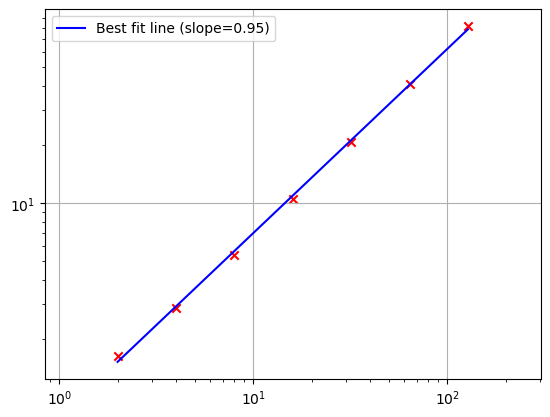

In [44]:
plt.scatter(ns,norms, marker="x", color="red")
# Calculate the logarithm of ns and norms
log_ns = np.log(ns)
log_norms = np.log(norms)

# Perform a linear fit on the log-log data
slope, intercept = np.polyfit(log_ns, log_norms, 1)

# Print the slope
print(f"Slope of the data in log-log space: {slope}")

# Plot the line of best fit
best_fit_line = np.exp(intercept) * ns**slope
plt.plot(ns, best_fit_line, label=f'Best fit line (slope={slope:.2f})', color='blue')

# Add legend
plt.legend()

plt.xscale("log")
plt.yscale("log")
plt.axis("equal")
plt.grid()
plt.show()